In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [5]:
hw_aa = pd.read_csv("hw_aa.csv", sep = ";")

In [6]:
# удалим лишний столбец
hw_aa = hw_aa.drop(['Unnamed: 0'], axis=1)

In [7]:
hw_aa.head()

,uid,experimentVariant,version,purchase
0,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [8]:
hw_aa.dtypes

uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

In [9]:
#посмотрим как произошло деление на группы?
hw_aa.experimentVariant.value_counts()

1    63916
0    63102
Name: experimentVariant, dtype: int64

In [10]:
hw_aa.groupby(["experimentVariant", "version"]).agg({"purchase": "mean"})

purchase
experimentVariant version           
0                 v2.8.0    0.000993
                  v2.9.0    0.074658
                  v3.7.4.0  0.059943
                  v3.8.0.0  0.057604
1                 v2.8.0    0.045606
                  v2.9.0    0.071304
                  v3.7.4.0  0.063018
                  v3.8.0.0  0.062848

In [11]:
# мы видим что версия очень сильно влияет на коэфициент покупок

Проведем АА тестирование на данных 

In [12]:
v_0 = hw_aa.query("experimentVariant == 0").purchase
v_1 = hw_aa.query("experimentVariant == 1").purchase

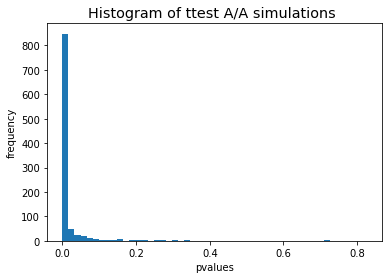

0.92

In [13]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v_0.sample(n_s, replace = False).values
    s2 = v_1.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Посчитаем pvalue для каждой версии приложения

In [14]:
v_0_28 = hw_aa.query("experimentVariant == 0 and version == 'v2.8.0'").purchase
v_1_28 = hw_aa.query("experimentVariant == 1 and version == 'v2.8.0'").purchase
#Для версии 2.8.0

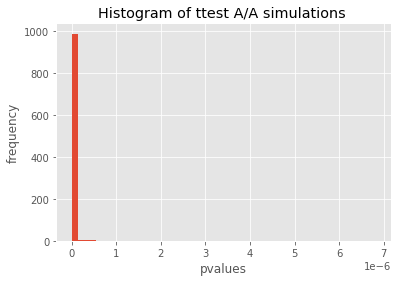

1.0

In [15]:
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v_0_28.sample(n_s, replace = False).values
    s2 = v_1_28.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [16]:
# версия 2.9.0 
v_0_29 = hw_aa.query("experimentVariant == 0 and version == 'v2.9.0'").purchase
v_1_29 = hw_aa.query("experimentVariant == 1 and version == 'v2.9.0'").purchase

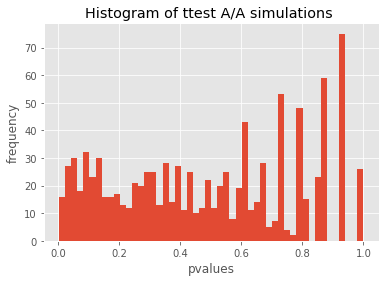

0.049

In [18]:
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v_0_29.sample(n_s, replace = False).values
    s2 = v_1_29.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [19]:
# версия 3.7.4.0
v_0_37 = hw_aa.query("experimentVariant == 0 and version == 'v3.7.4.0'").purchase
v_1_37 = hw_aa.query("experimentVariant == 1 and version == 'v3.7.4.0'").purchase

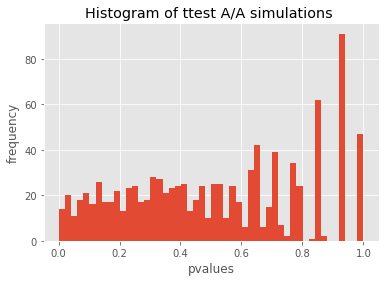

0.041

In [20]:
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v_0_37.sample(n_s, replace = False).values
    s2 = v_1_37.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [21]:
# версия 3.8.0.0
v_0_38 = hw_aa.query("experimentVariant == 0 and version == 'v3.8.0.0'").purchase
v_1_38 = hw_aa.query("experimentVariant == 1 and version == 'v3.8.0.0'").purchase

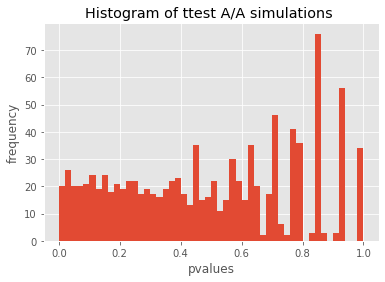

0.057

In [22]:
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v_0_38.sample(n_s, replace = False).values
    s2 = v_1_38.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

небольшое превышение заданного значения pvalue

In [23]:
# Посчитаем наши данные без багованных (предположительно) данных

In [24]:
v_0_all = hw_aa.query("experimentVariant == 0 and version != 'v2.8.0'").purchase
v_1_all = hw_aa.query("experimentVariant == 1 and version != 'v2.8.0'").purchase

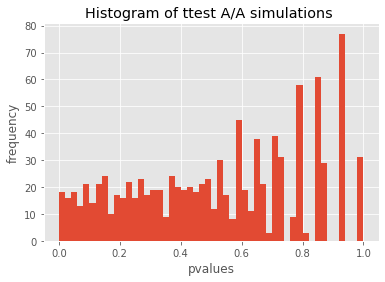

0.042

In [25]:
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v_0_all.sample(n_s, replace = False).values
    s2 = v_1_all.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [26]:
# Таким образом, мы нашли проблему, проблема появляется на конкретной версии приложения. АА тестирование позволило
# статистически доказать значимость различий в данных в зависимотси от версии мобильного приложения. По всей видимости
#  версия 2.8.работает некорректно.